In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

In [6]:
dataset = pd.read_csv("Iris.csv")
dataset.drop(["Id", "Species"], axis = "columns", inplace = True)
dataset.drop("SepalLengthCm", axis = "columns", inplace = True)
dataset.drop("SepalWidthCm", axis = "columns", inplace = True)
scaler = MinMaxScaler()
scaler.fit(dataset[['PetalLengthCm']])
dataset["PetalLengthCm"] = scaler.transform(dataset[["PetalLengthCm"]])
scaler.fit(dataset[['PetalWidthCm']])
dataset["PetalWidthCm"] = scaler.transform(dataset[["PetalWidthCm"]])
model = KMeans(n_clusters = 3)

predicted = model.fit_predict(dataset)
dataset["cluster"] = predicted

[[0.55867014 0.51041667]
 [0.07864407 0.06      ]
 [0.7740113  0.81510417]]


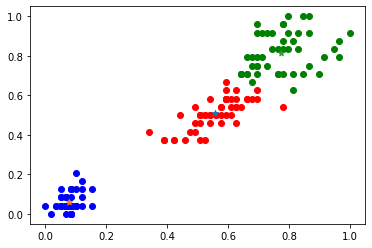

In [3]:
dataset1 = dataset[dataset["cluster"] == 0]
dataset2 = dataset[dataset["cluster"] == 1]
dataset3 = dataset[dataset["cluster"] == 2]
plt.scatter(dataset1["PetalLengthCm"], dataset1["PetalWidthCm"], color = "red")
plt.scatter(dataset2["PetalLengthCm"], dataset2["PetalWidthCm"], color = "blue")
plt.scatter(dataset3["PetalLengthCm"], dataset3["PetalWidthCm"], color = "green")
x = model.cluster_centers_
plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1], marker = "*")
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1], marker = "*")
plt.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1], marker = "*")
print(x)

In [7]:
dataset.head()

,PetalLengthCm,PetalWidthCm,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


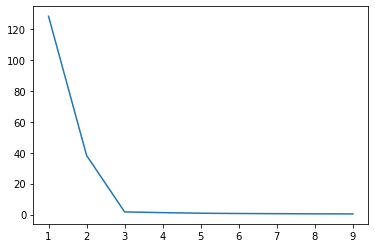

In [4]:
k_rng = range(1,10)
ssr   = []
for k in k_rng:
    model = KMeans(n_clusters = k)
    model.fit(dataset)
    ssr.append(model.inertia_)
plt.plot(k_rng, ssr)